<a href="https://colab.research.google.com/github/mdrahitazim/Machine-Learning/blob/main/Advertising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Import necessary libraries and load the dataset


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/nguyen-toan/ISLR/master/dataset/Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Step 2: Preprocess the data

In [3]:



# Drop any unnecessary columns
df = df.drop(['Unnamed: 0'], axis=1)

# Scale the data using StandardScaler (optional)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['TV', 'Radio', 'Newspaper', 'Sales']] = scaler.fit_transform(df[['TV', 'Radio', 'Newspaper', 'Sales']])


In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683


## Step 3: Split the data into training and test sets

In [13]:
# Split the data into training (80%) and test (20%) sets
X = df.drop('Sales', axis=1)
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)



# Step 4: Build and compare Linear Regression models

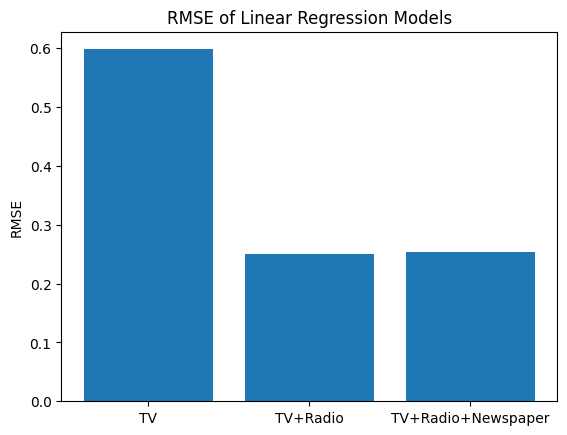

In [14]:


# Build Linear Regression models
model_tv = LinearRegression()
model_tv_radio = LinearRegression()
model_tv_radio_newspaper = LinearRegression()

# Train the models
model_tv.fit(X_train[['TV']], y_train)
model_tv_radio.fit(X_train[['TV', 'Radio']], y_train)
model_tv_radio_newspaper.fit(X_train[['TV', 'Radio', 'Newspaper']], y_train)

# Predict on the test set
y_pred_tv = model_tv.predict(X_test[['TV']])
y_pred_tv_radio = model_tv_radio.predict(X_test[['TV', 'Radio']])
y_pred_tv_radio_newspaper = model_tv_radio_newspaper.predict(X_test[['TV', 'Radio', 'Newspaper']])

# Calculate RMSE
rmse_tv = mean_squared_error(y_test, y_pred_tv, squared=False)
rmse_tv_radio = mean_squared_error(y_test, y_pred_tv_radio, squared=False)
rmse_tv_radio_newspaper = mean_squared_error(y_test, y_pred_tv_radio_newspaper, squared=False)

# Visualize RMSE using a bar diagram
plt.bar(['TV', 'TV+Radio', 'TV+Radio+Newspaper'], [rmse_tv, rmse_tv_radio, rmse_tv_radio_newspaper])
plt.ylabel('RMSE')
plt.title('RMSE of Linear Regression Models')
plt.show()


# Step 5: Perform robustness check using different random seeds


Random Seed: 42
TV Model RMSE: 0.6138026538902926
TV+Radio Model RMSE: 0.3403709518410679
TV+Radio+Newspaper Model RMSE: 0.3423258843824189


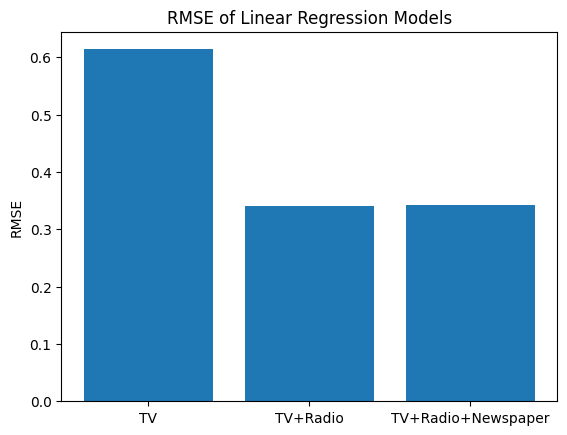

Random Seed: 100
TV Model RMSE: 0.5980339319035507
TV+Radio Model RMSE: 0.2506499614877513
TV+Radio+Newspaper Model RMSE: 0.25296799668074066


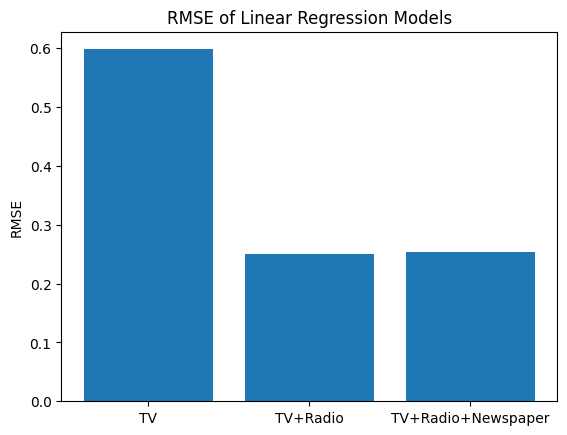

Random Seed: 200
TV Model RMSE: 0.6443131953834087
TV+Radio Model RMSE: 0.4509712817544705
TV+Radio+Newspaper Model RMSE: 0.4512887137691906


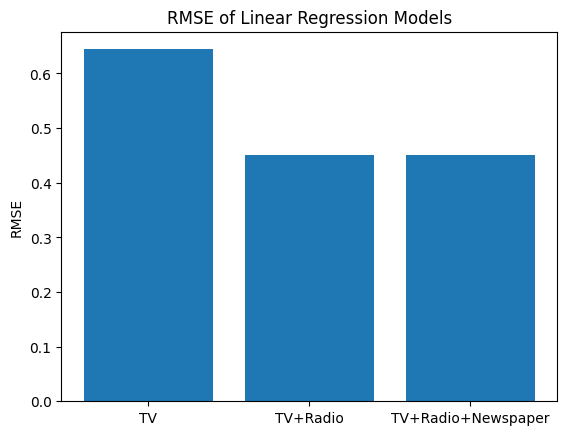

Random Seed: 300
TV Model RMSE: 0.6289790380457377
TV+Radio Model RMSE: 0.2781777651252599
TV+Radio+Newspaper Model RMSE: 0.2781933221732915


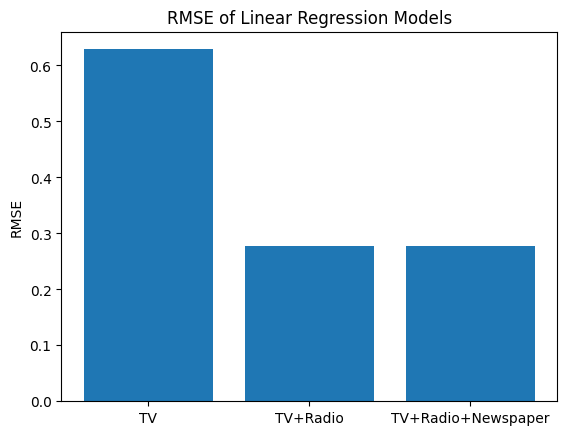

Random Seed: 400
TV Model RMSE: 0.5619688943327341
TV+Radio Model RMSE: 0.40635835935948944
TV+Radio+Newspaper Model RMSE: 0.41135818667888263


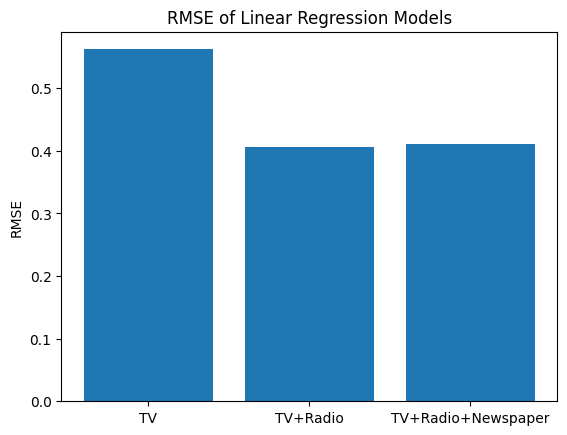

Random Seed: 500
TV Model RMSE: 0.7022340903664136
TV+Radio Model RMSE: 0.43206034690319245
TV+Radio+Newspaper Model RMSE: 0.4343828991464793


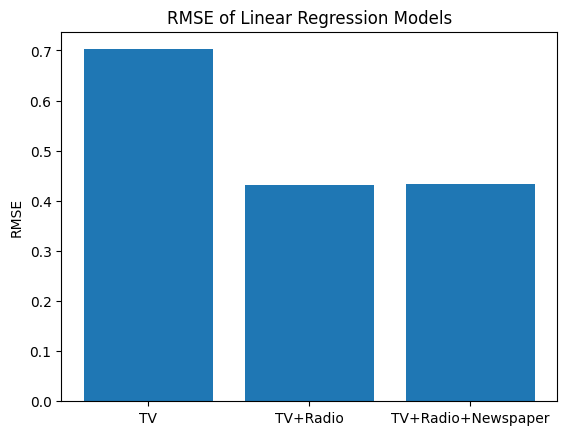

Random Seed: 600
TV Model RMSE: 0.628602646601934
TV+Radio Model RMSE: 0.2621384363848737
TV+Radio+Newspaper Model RMSE: 0.26217092860621827


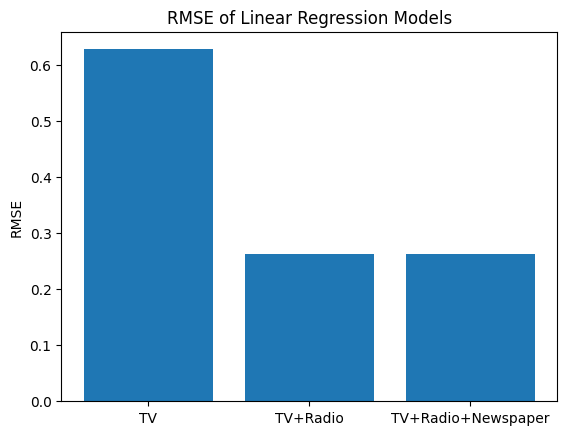

Random Seed: 700
TV Model RMSE: 0.6152032745997553
TV+Radio Model RMSE: 0.2910940294047379
TV+Radio+Newspaper Model RMSE: 0.29300693870285316


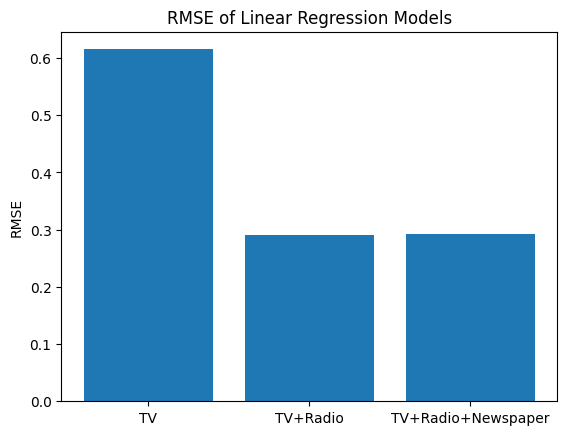

Random Seed: 800
TV Model RMSE: 0.5426413935598168
TV+Radio Model RMSE: 0.28120475260969663
TV+Radio+Newspaper Model RMSE: 0.28331635689788853


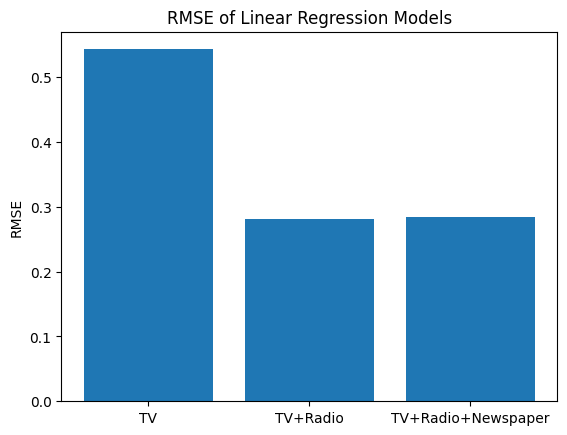

Random Seed: 900
TV Model RMSE: 0.7552248866456065
TV+Radio Model RMSE: 0.3445772348597556
TV+Radio+Newspaper Model RMSE: 0.3451577813645026


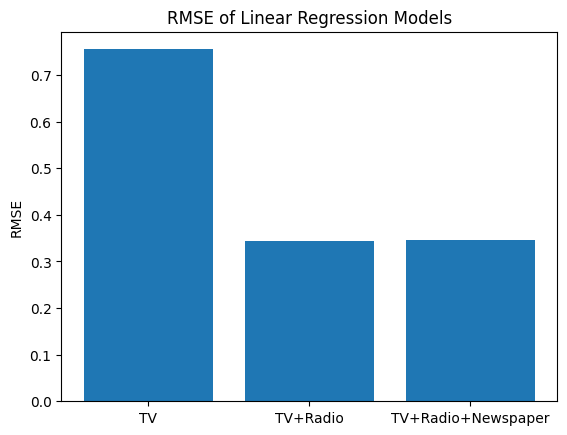

In [12]:
#use different random seeds to perform the train test split
#and calculate the RMSE for each model
#then visualize for each random seed the rmse for each linear models
seeds=[42,100,200,300,400,500,600,700,800,900]
def perform_robustness_check(seed):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    model_tv.fit(X_train[['TV']], y_train)
    model_tv_radio.fit(X_train[['TV', 'Radio']], y_train)
    model_tv_radio_newspaper.fit(X_train[['TV', 'Radio', 'Newspaper']], y_train)


    y_pred_tv = model_tv.predict(X_test[['TV']])
    y_pred_tv_radio = model_tv_radio.predict(X_test[['TV', 'Radio']])
    y_pred_tv_radio_newspaper = model_tv_radio_newspaper.predict(X_test[['TV', 'Radio', 'Newspaper']])


    rmse_tv = mean_squared_error(y_test, y_pred_tv, squared=False)
    rmse_tv_radio = mean_squared_error(y_test, y_pred_tv_radio, squared=False)
    rmse_tv_radio_newspaper = mean_squared_error(y_test, y_pred_tv_radio_newspaper, squared=False)

    plt.bar(['TV', 'TV+Radio', 'TV+Radio+Newspaper'], [rmse_tv, rmse_tv_radio, rmse_tv_radio_newspaper])
    plt.ylabel('RMSE')
    plt.title('RMSE of Linear Regression Models')

    print(f"Random Seed: {seed}")
    print(f"TV Model RMSE: {rmse_tv}")
    print(f"TV+Radio Model RMSE: {rmse_tv_radio}")
    print(f"TV+Radio+Newspaper Model RMSE: {rmse_tv_radio_newspaper}")
    plt.show()

    return rmse_tv, rmse_tv_radio, rmse_tv_radio_newspaper


rmse_values_tv = [perform_robustness_check(seed) for seed in seeds]


**seed 100 is giving the lowest rmse**

# Step 6: Compare the best-performing Linear Regression model with kNN regression


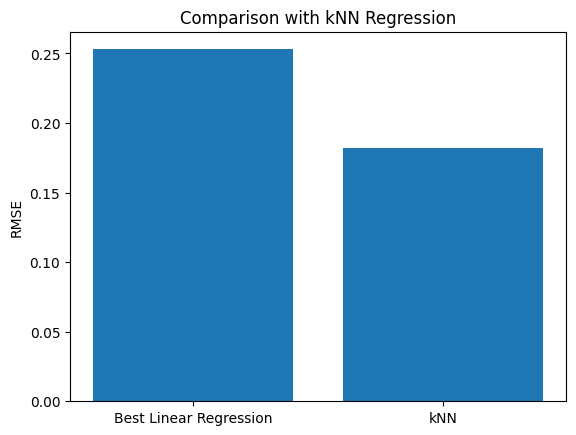

In [15]:

# Select the best-performing Linear Regression model
best_model = model_tv_radio_newspaper

# Build a kNN regression model
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the kNN model
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

# Calculate RMSE
rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)

# Visualize the comparison
plt.bar(['Best Linear Regression', 'kNN'], [rmse_tv_radio_newspaper, rmse_knn])
plt.ylabel('RMSE')
plt.title('Comparison with kNN Regression')
plt.show()


In [16]:
# Step -7 Data Analysis

# Step 7: Data Analysis

In [21]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/nguyen-toan/ISLR/master/dataset/Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [22]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [23]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [24]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


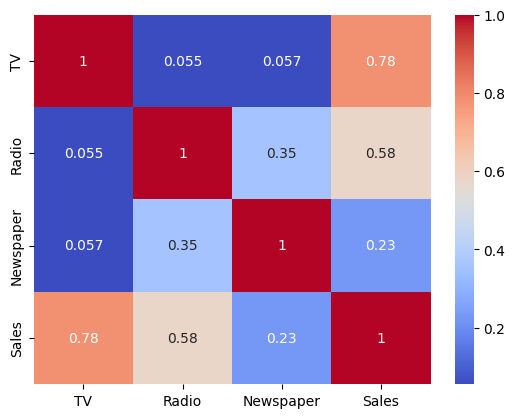

In [28]:
#plotting a heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

Insights:

- There is a strong positive correlation between TV and Sales, indicating that as TV advertising increases, Sales tend to increase.
- Similarly, there is a positive correlation between Radio and Sales, and Newspaper and Sales.
- The correlation between TV and Radio is high, suggesting that these two advertising channels may be related.

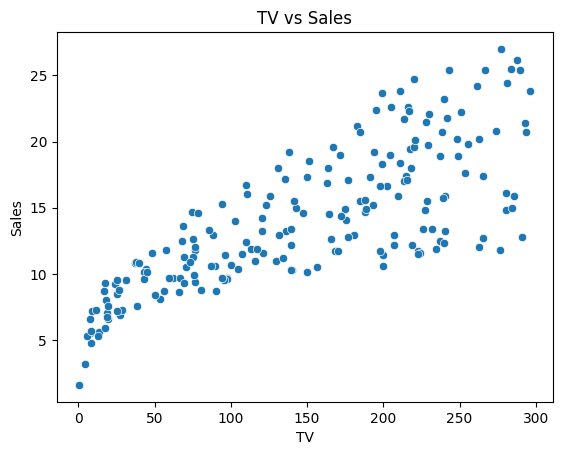

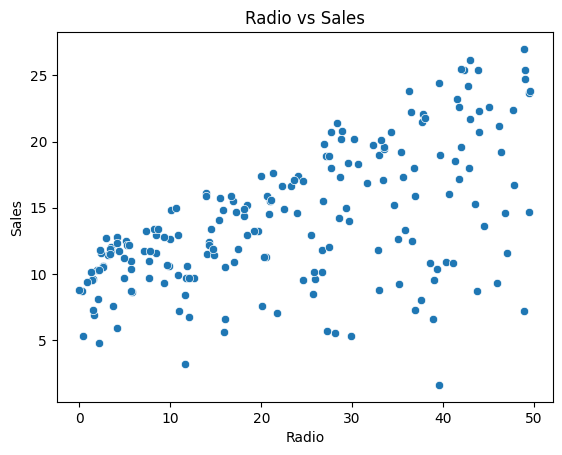

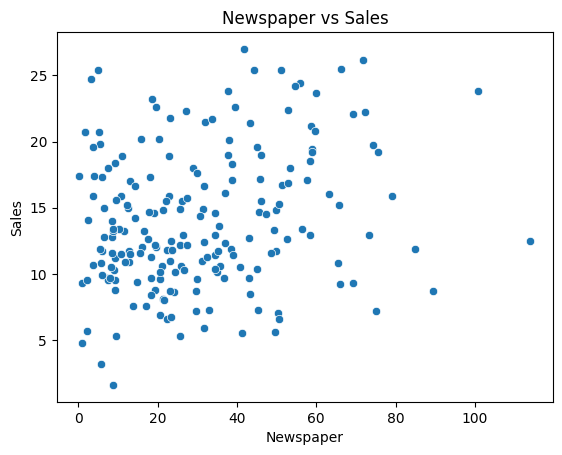

In [25]:

# Visualizations
sns.scatterplot(x='TV', y='Sales', data=df)
plt.title('TV vs Sales')
plt.show()

sns.scatterplot(x='Radio', y='Sales', data=df)
plt.title('Radio vs Sales')
plt.show()

sns.scatterplot(x='Newspaper', y='Sales', data=df)
plt.title('Newspaper vs Sales')
plt.show()